In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df= pd.read_csv('Housing_data.csv')

In [22]:
df.shape

(1047, 7)

In [23]:
df.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1047 non-null   int64  
 1   LivingArea  1047 non-null   int64  
 2   Bathrooms   1047 non-null   float64
 3   Bedrooms    1047 non-null   int64  
 4   LotSize     1047 non-null   float64
 5   Age         1047 non-null   int64  
 6   Fireplace   1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


In [25]:
df.isnull().sum()

Price         0
LivingArea    0
Bathrooms     0
Bedrooms      0
LotSize       0
Age           0
Fireplace     0
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(12)

In [27]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [28]:
df.duplicated().sum()

np.int64(0)

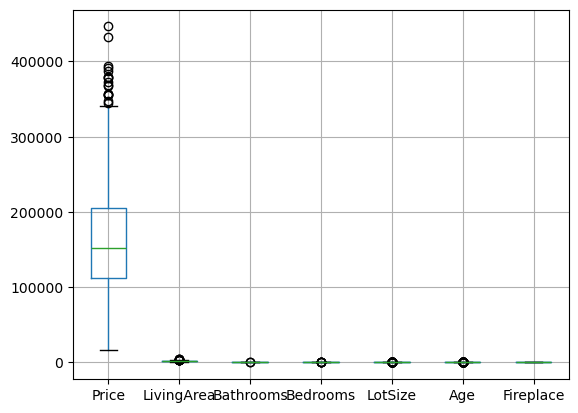

In [29]:
### Checking the outliers
df.boxplot()
plt.show()

In [30]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    ## df[column]= df[column].apply(lambda x:x if x>=lower_extreme else x if x<= upper_extreme) 
    df[column]= df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x) 
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

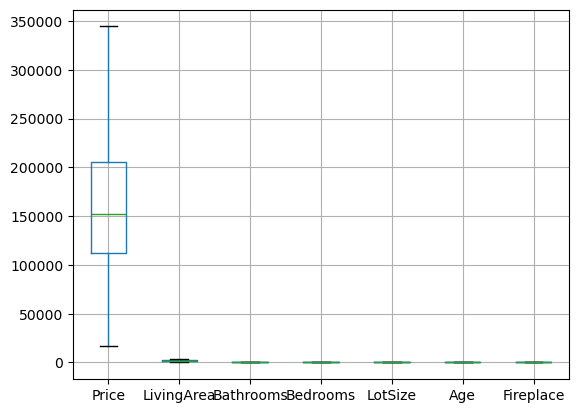

In [31]:
df.boxplot()
plt.show()

In [32]:
df.shape

(1035, 7)

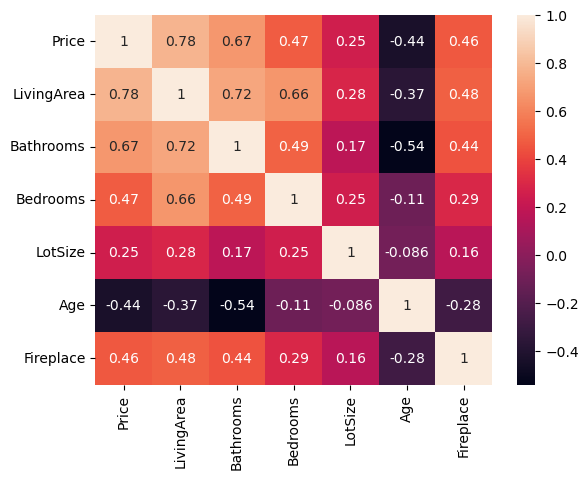

In [33]:
### Feature selection
corr= df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [34]:
target=df[['Price']]
features=df.drop(columns=['Price'])

In [35]:
### Multicolinearity
### Variance_Inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif= pd.DataFrame()
vif['features']=features.columns
vif['VIF']= [variance_inflation_factor(features.values,i) for i in range(len(features.columns))]
features.values

array([[1.629e+03, 1.000e+00, 3.000e+00, 7.600e-01, 7.525e+01, 0.000e+00],
       [1.344e+03, 2.000e+00, 3.000e+00, 9.200e-01, 1.300e+01, 0.000e+00],
       [8.220e+02, 1.000e+00, 2.000e+00, 5.600e-01, 7.525e+01, 0.000e+00],
       ...,
       [3.361e+03, 3.500e+00, 4.000e+00, 7.100e-01, 1.000e+00, 1.000e+00],
       [3.250e+03, 2.500e+00, 3.000e+00, 5.300e-01, 2.300e+01, 1.000e+00],
       [3.467e+03, 2.500e+00, 4.000e+00, 3.400e-01, 3.000e+00, 1.000e+00]])

In [40]:
vif.sort_values(by='VIF',ascending=False)

,features,VIF
2,Bedrooms,29.100456
0,LivingArea,28.393716
1,Bathrooms,21.617158
3,LotSize,3.345417
5,Fireplace,3.304989
4,Age,2.471556


In [41]:
from sklearn.feature_selection import f_regression
import warnings
warnings.filterwarnings('ignore')

In [43]:
f_reg=f_regression(features,target)

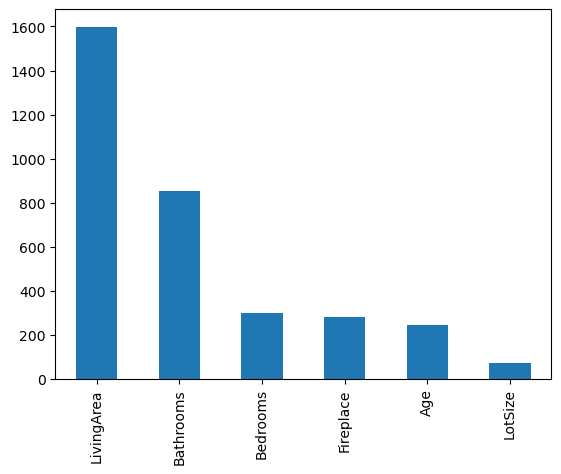

In [45]:
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [47]:
features.drop(columns=['LotSize'],inplace=True)

In [52]:
features.head()

,LivingArea,Bathrooms,Bedrooms,Age,Fireplace
0,-0.277590,1.0,3.0,2.258368,0
1,-0.730058,2.0,3.0,-0.488931,0
2,-1.558790,1.0,2.0,2.258368,0
3,-0.418887,1.0,2.0,2.258368,0
4,-0.768161,1.0,3.0,2.258368,0


In [51]:
### Scaling 
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()
features[['LivingArea','Age']]= std_sca.fit_transform(features[['LivingArea','Age']])

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

In [83]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(828, 5)
(207, 5)
(828, 1)
(207, 1)


In [84]:
lin_model= LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [85]:
lin_model.intercept_

array([140808.33324477])

In [86]:
lin_model.coef_

array([[41043.46281994, 16553.75124833, -4643.55163078, -5807.91047026,
        10657.89922334]])

In [87]:
### Training Validation
y_pred=lin_model.predict(x_train)
r2_score(y_train,y_pred)

0.6445071892699901

In [88]:
## Testing Validation
y_pred1=lin_model.predict(x_test)
r2_score(y_test,y_pred1)

0.662819220439637

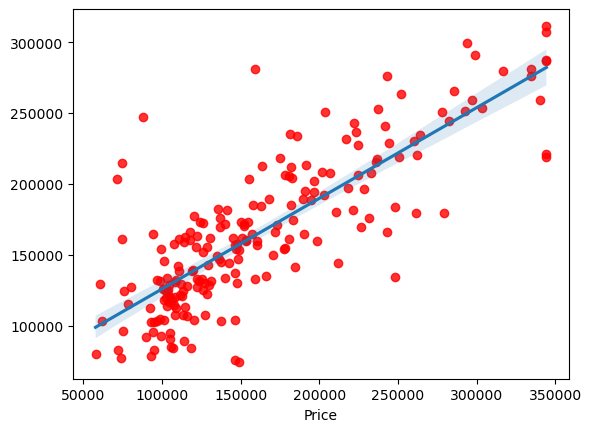

In [91]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred1,scatter_kws={'color':'red'})
plt.show()